# Amir Hossein Movahedi 
## Isfahan University Techlonogy(IUT)
* Fall 2022 

**Solve the schrodinger equation with numberical method**

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
L= 5/0.53 #bohr
a = 10/27.21 #harrtery
dimention = 10

In [3]:
#potential func
def V(m, n):
    if n == m:
        return(L**2)/4*(a/L)
    elif ((n != m) and ((n%2 == 0 and m%2 == 0) or (n%2 == 1 and m%2 == 1))):
        return 0
    elif ((n != m) and ((n%2 == 1 and m%2 == 0) or (n%2 == 0 and m%2 == 1))):
        return(-(2*L/np.pi)**2 * (m*n/(m**2 - n**2)**2))*(a/L)
#kinetic func
def T(m, n):
    if n == m:
        return (((m+1)*np.pi/L)**2)/2
    else:
        return 0

In [4]:
V_matrix = np.zeros((dimention, dimention))
T_matrix = np.diag(np.ones(dimention))

for i in range(dimention):
    for j in range(dimention):
        V_matrix[i][j] = V(i + 1, j + 1)
        T_matrix[i][j] = T(i, j)
        

In [5]:
#Hamiltoni
H =V_matrix+T_matrix

In [6]:
#eign vector and eign value
val, vec = la.eigh(H)
# change to ev
val[:3]*27.21


array([16.32096301, 28.54044011, 38.75408039])

In [10]:
#sumation func
def vec_func(vec, x):
    C = [np.sin(n * np.pi * x / L) for n in range(1, dimention+1)]
    return np.sqrt(2/L) * sum(vec*C)


x = np.arange(0, L+0.01, 0.01) #x axies
N = 5 #number of si

#wave func
si = []

for i in range(N):
    si.append((np.array([vec_func(vec[:, i], j) for j in x])))

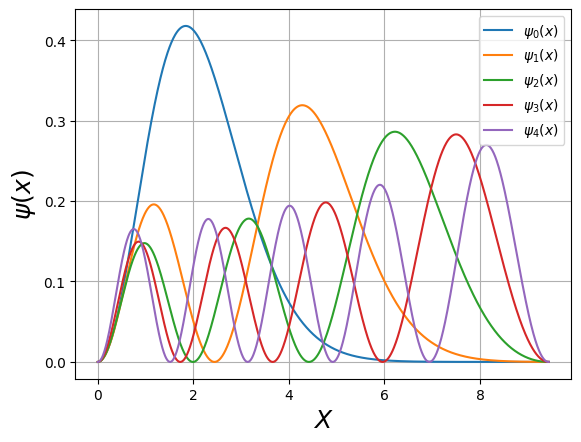

In [11]:
for  i in range(N):
    plt.plot(x, si[i]**2, label=f"$\psi_{i}(x)$")

plt.xlabel("$X$", size = 18)
plt.ylabel("$\psi(x)$", size = 18)
plt.grid()
plt.legend()